# analyze_results.py


In [4]:

import pandas as pd
import matplotlib.pyplot as plt


# 1) Charger results.csv


In [11]:
try:
    df = pd.read_csv(r"M:\Ecole\tradingAgent\models\results_ADAUSDT_20250502_102255.csv")
except FileNotFoundError:
    raise RuntimeError("Le fichier result.csv est introuvable. Veuillez d'abord générer vos backtests.")



# 2) Afficher le tableau complet


In [12]:
print("\n=== Résultats Backtest Multi‑Crypto ===")
print(df.to_string(index=False))



=== Résultats Backtest Multi‑Crypto ===
 symbol  cum_return  sharpe  max_drawdown  train_rewards_mean  hp_WINDOW_SIZE  hp_MAX_STEPS  hp_INITIAL_EPS  hp_MIN_EPS  hp_DECAY_RATE  hp_BUFFER_SIZE  hp_BATCH_SIZE    hp_LR  hp_GAMMA  hp_TARGET_FREQ  hp_HIDDEN_DIM                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# 3) Bar charts pour chaque métrique


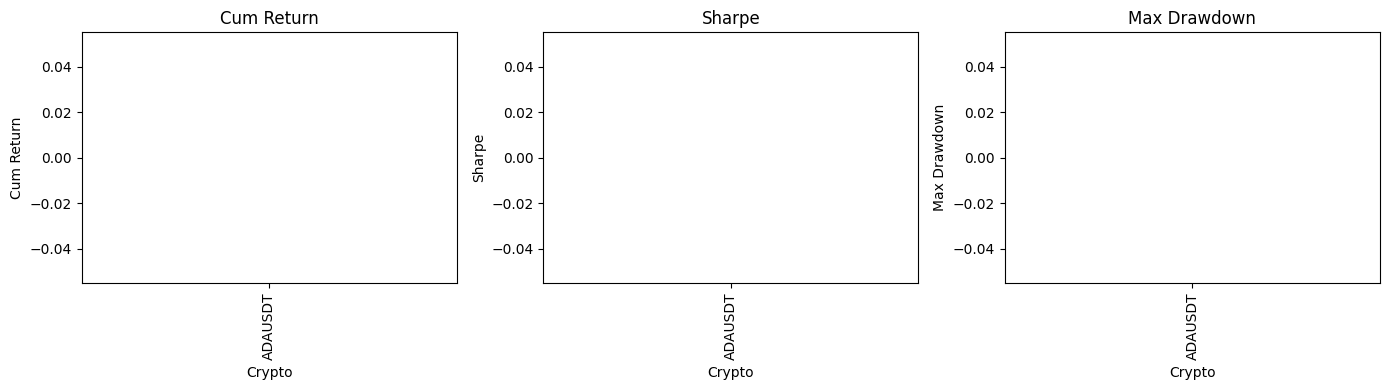

In [13]:
metrics = ["cum_return", "sharpe", "max_drawdown"]
fig, axes = plt.subplots(1, len(metrics), figsize=(14,4))
for ax, m in zip(axes, metrics):
    df.plot.bar(x="symbol", y=m, ax=ax, legend=False)
    ax.set_title(m.replace("_"," ").title())
    ax.set_xlabel("Crypto")
    ax.set_ylabel(m.replace("_"," ").title())
plt.tight_layout()
plt.savefig("metrics_bar.png")
plt.show()

# 4) Scatter: Cumulative Return vs Sharpe


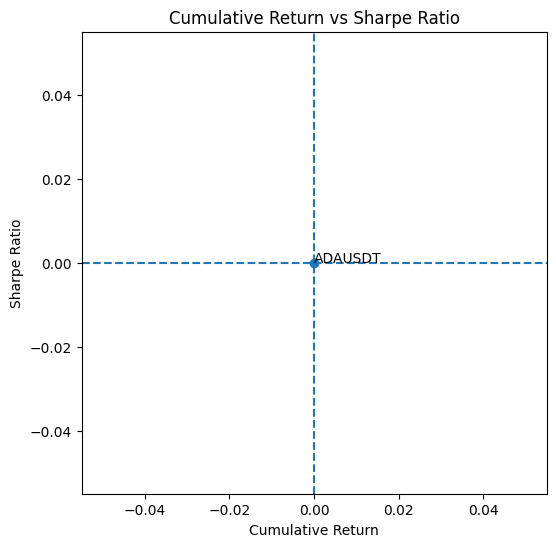

In [14]:


plt.figure(figsize=(6,6))
plt.scatter(df["cum_return"], df["sharpe"])
for i,row in df.iterrows():
    plt.annotate(row["symbol"], (row["cum_return"], row["sharpe"]))
plt.axhline(0, linestyle='--')
plt.axvline(0, linestyle='--')
plt.title("Cumulative Return vs Sharpe Ratio")
plt.xlabel("Cumulative Return")
plt.ylabel("Sharpe Ratio")
plt.savefig("return_vs_sharpe.png")
plt.show()





# 5) Interprétation basique


In [15]:
best_return = df.loc[df["cum_return"].idxmax()]
best_sharpe = df.loc[df["sharpe"].idxmax()]
worst_dd = df.loc[df["max_drawdown"].idxmax()]

print(f"\n→ Meilleur rendement cumulé : {best_return.symbol} ({best_return.cum_return:.3f})")
print(f"→ Meilleur Sharpe ratio   : {best_sharpe.symbol} ({best_sharpe.sharpe:.3f})")
print(f"→ Plus fort drawdown      : {worst_dd.symbol} ({worst_dd.max_drawdown:.3f})")



→ Meilleur rendement cumulé : ADAUSDT (0.000)
→ Meilleur Sharpe ratio   : ADAUSDT (0.000)
→ Plus fort drawdown      : ADAUSDT (0.000)
